In [1]:
from haplotype_analysis import *

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Evaluating EAGLE2 and refLinker haplotypes for RPE-1 chr2

EAGLE2 accuracy chr2 0.5084104938271605
refLinker accuracy chr2 0.9937881637051279
refLinker accuracy chr2 0.9929387969933705


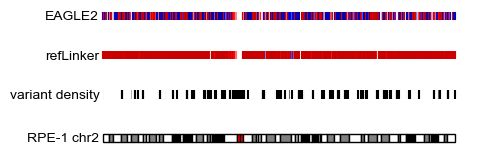

In [7]:
linker_path = "./cell_line_data/reflinker_haplotypes/pop_hap_solution_20240108_RPE1_SRS1045724_5_chr2.dat"
linker_recovered_path = "RPE1_recovered_haplotype_chr2.dat"

linker_hap = pd.read_csv(linker_path, header=None, sep="\t")
linker_recovered_hap = pd.read_csv(linker_recovered_path, sep="\t")

eagle_acc, eagle_hap = calculate_eagle2_accuracy_rpe1(linker_hap.copy(), "chr2")
linker_acc, linker_hap = calculate_accuracy_rpe1(linker_hap.copy(), "chr2")
linker_acc, linker_hap = calculate_accuracy_recovered_rpe1(linker_recovered_hap.copy(), "chr2")

binsize = int(2e5)
chrom_bins = range(0, getSize("chr2")+binsize, binsize)
eagle2_bin_ids = np.digitize(eagle_hap[1], chrom_bins)
linker_bin_ids = np.digitize(linker_hap["pos"], chrom_bins)

eagle2_binned_acc = eagle_hap[12].groupby(eagle2_bin_ids).mean()
linker_binned_acc = linker_hap["agreement"].groupby(linker_bin_ids).mean()*-1
binned_counts = linker_hap["hap"].groupby(linker_bin_ids).count()

eagle2_in_bins = [chrom_bins[i-1] for i in np.unique(eagle2_bin_ids)]
linker_in_bins = [chrom_bins[i-1] for i in np.unique(linker_bin_ids)]

out_bins = list(set(chrom_bins) - set(linker_in_bins))


fig, ax = plt.subplots()

ax.scatter(eagle2_in_bins, 
           np.zeros(len(eagle2_in_bins)), 
           c = eagle2_binned_acc, 
           cmap = "seismic", 
           vmin = -1.4, 
           vmax = 1.4, 
           marker = "|")

ax.scatter(linker_in_bins, 
           np.zeros(len(linker_in_bins)) - 1, 
           c = linker_binned_acc, 
           cmap = "seismic", 
           vmin = -1.4, 
           vmax = 1.4, 
           marker = "|")

ax.scatter(linker_in_bins, 
           np.zeros(len(linker_in_bins)) - 2, 
           c = binned_counts,
           cmap='gray', 
           vmin=0, 
           vmax=3, 
           marker='|')

ax.scatter(out_bins, 
           np.zeros(len(out_bins)) - 2, 
           c = np.zeros(len(out_bins)),
           cmap='gray', 
           vmin=0, 
           vmax=3, 
           marker='|')

loop_bands = chr_bands[chr_bands['chrom']=="chr2"]
for i in range(loop_bands.shape[0]):
            row = loop_bands.iloc[i]
            rect=mpatches.Rectangle((row['chromStart'], -3),
                                    row['chromEnd']-row['chromStart'],-0.2, 
                                    fill = True,
                                    edgecolor = 'black',
                                    facecolor = row['color'],
                                    linewidth = 1)
            ax.add_patch(rect)        


ax.text(-200*binsize, -0.1, "EAGLE2") 
ax.text(-200*binsize, -1.1, "refLinker") 
ax.text(-320*binsize, -2.1, "variant density") 
ax.text(-260*binsize, -3.2, "RPE-1 chr2") 
ax.set_axis_off()

### Evaluating refLinker haplotypes for HCC1954BL (normal) and HCC1954T (cancer) Hi-C data

chr17 0.9886314740584732
chr17 0.9904166666666666
refLinker recovered accuracy chr17 0.9905804252265183


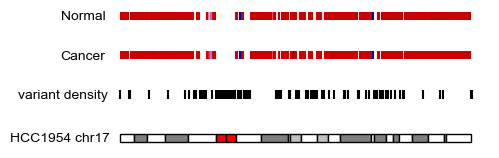

In [6]:
bl_path = "./cell_line_data/reflinker_haplotypes/pop_hap_solution_20230816_BL_allvar_chr17.dat"
bl_hap = pd.read_csv(bl_path, header=None, sep="\t")
bl_hap[1] = bl_hap[1]+1
bl_acc, bl_hap = calculate_accuracy_hcc1954(bl_hap.copy(), "chr17")

cancer_path = "./cell_line_data/reflinker_haplotypes/pop_hap_solution_20231224_HCC1954_cancer_chr17.dat"
cancer_recovered_path = "HCC1954_recovered_haplotype_chr17.dat"

cancer_hap = pd.read_csv(cancer_path, header=None, sep="\t")
cancer_hap[1] = cancer_hap[1]+1
cancer_acc, cancer_hap = calculate_accuracy_hcc1954(cancer_hap.copy(), "chr17")

cancer_recovered_hap = pd.read_csv(cancer_recovered_path, sep="\t")
cancer_recovered_acc, cancer_recovered_hap = calculate_accuracy_recovered_hcc1954(cancer_recovered_hap.copy(), "chr17")

binsize = int(2e5)
chrom_bins = range(0, getSize("chr17")+binsize, binsize)
bl_bin_ids = np.digitize(bl_hap[1], chrom_bins)
#cancer_bin_ids = np.digitize(cancer_hap[1], chrom_bins)
cancer_bin_ids = np.digitize(cancer_recovered_hap["pos"], chrom_bins)

bl_binned_acc = bl_hap[12].groupby(bl_bin_ids).mean()*-1
#cancer_binned_acc = cancer_hap[12].groupby(cancer_bin_ids).mean()*-1
cancer_binned_acc = cancer_recovered_hap["agreement"].groupby(cancer_bin_ids).mean()*-1
binned_counts = cancer_recovered_hap["pos"].groupby(cancer_bin_ids).count()

bl_in_bins = [chrom_bins[i-1] for i in np.unique(bl_bin_ids)]
cancer_in_bins = [chrom_bins[i-1] for i in np.unique(cancer_bin_ids)]

out_bins = list(set(chrom_bins) - set(cancer_in_bins))


fig, ax = plt.subplots()

ax.scatter(bl_in_bins, 
           np.zeros(len(bl_in_bins)), 
           c = bl_binned_acc, 
           cmap = "seismic", 
           vmin = -1.4, 
           vmax = 1.4, 
           marker = "|")

ax.scatter(cancer_in_bins, 
           np.zeros(len(cancer_in_bins)) - 1, 
           c = cancer_binned_acc, 
           cmap = "seismic", 
           vmin = -1.4, 
           vmax = 1.4, 
           marker = "|")

ax.scatter(cancer_in_bins, 
           np.zeros(len(cancer_in_bins)) - 2, 
           c = binned_counts,
           cmap='gray', 
           vmin=0, 
           vmax=3, 
           marker='|')

ax.scatter(out_bins, 
           np.zeros(len(out_bins)) - 2, 
           c = np.zeros(len(out_bins)),
           cmap='gray', 
           vmin=0, 
           vmax=3, 
           marker='|')

loop_bands = chr_bands[chr_bands['chrom']=="chr17"]
for i in range(loop_bands.shape[0]):
            row = loop_bands.iloc[i]
            rect=mpatches.Rectangle((row['chromStart'], -3),
                                    row['chromEnd']-row['chromStart'],-0.2, 
                                    fill = True,
                                    edgecolor = 'black',
                                    facecolor = row['color'],
                                    linewidth = 1)
            ax.add_patch(rect)        


ax.text(-70*binsize, -0.1, "Normal") 
ax.text(-70*binsize, -1.1, "Cancer") 
ax.text(-120*binsize, -2.1, "variant density") 
ax.text(-130*binsize, -3.2, "HCC1954 chr17") 
ax.set_axis_off()

### Calculating HCC1954 allelic copy-number from refLinker haplotypes

/Users/gjb36/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
/Users/gjb36/Documents/refLinker_CellSystemsRevision/results_for_paper/refLinker/results_for_paper/haplotype_analysis.py:72: RuntimeWarning: All-NaN slice encountered
  median_gc_strength[GC_id, :] = np.nanmedian(counts, axis=0)
/Users/gjb36/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/gjb36/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/gjb36/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/gjb36/opt/anaconda3/lib/python3.9/site-pac

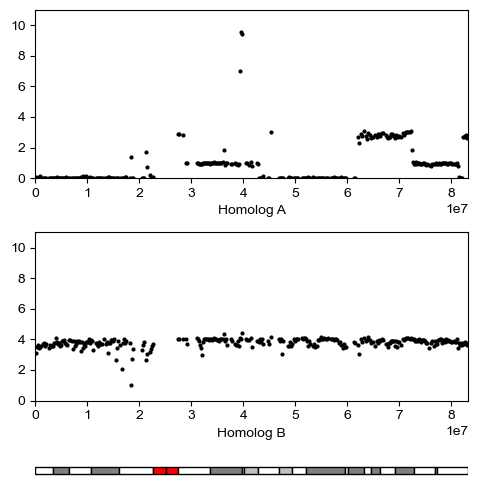

In [4]:
Bins_10kb = pd.read_csv('./genome_info/Bins_10kb.csv', sep=',')
Bins_10kb = Bins_10kb[Bins_10kb.NonNBase>0]
Bins_10kb.index = range(Bins_10kb.shape[0])
hg38_bins = pd.read_csv('./genome_info/hg38.bins.csv', sep='\t', header=None)
hg38_bins.columns = ['Chr', 'Start', 'End', 'NonNBase', 'GC', 'gBand']

counts = pd.read_csv("./cell_line_data/HCC1954.10kb_counts.txt", sep="\t", comment="@")
allelic_depths = pd.read_csv("./cell_line_data/HCC1954.hetSNP.AD.chr17.txt", sep="\t")

counts_filtered = pd.DataFrame(counts[counts.CONTIG.isin(chrom_list)])
normCov, bins = correctGC(pd.DataFrame(counts_filtered.COUNT), hg38_bins, Bins_10kb)
counts_filtered['COUNT'] = normCov.COUNT.values
counts = counts_filtered.copy()

chrom = "chr17"

chrom_counts = counts[counts["CONTIG"]==chrom].reset_index(drop=True)
chrom_allelic_depths = allelic_depths[allelic_depths["contig"]==chrom].reset_index(drop=True)

acn = calculate_acn(chrom_counts, cancer_hap, chrom_allelic_depths, chrom)

binsize = int(2e5)

chrom_bins_200kb = range(0, getSize(chrom)+binsize, binsize)

bin_ids = np.digitize(acn.position, chrom_bins_200kb)

binned_acn = acn[['CN_A', 'CN_B']].groupby(bin_ids).mean()

binned_acn['CN_A'][binned_acn['CN_A'] > 4] = np.log2(binned_acn['CN_A'][binned_acn['CN_A'] > 4]) + 2
binned_acn['CN_B'][binned_acn['CN_B'] > 4] = np.log2(binned_acn['CN_B'][binned_acn['CN_B'] > 4]) + 2

binned_counts = acn['position'].groupby(bin_ids).count()
binned_acn['pos'] = [chrom_bins_200kb[i-1] for i in np.unique(bin_ids)]

binned_acn = binned_acn[binned_counts >= 10]

plt.rcParams['figure.figsize'] = [5, 5]

fig, ax = plt.subplots(nrows = 3, gridspec_kw={'height_ratios': [1, 1,  0.15]})

ax[0].scatter(binned_acn.pos, binned_acn.CN_A, s=4, c="black")
ax[1].scatter(binned_acn.pos, binned_acn.CN_B, s=4, c="black")

loop_bands = chr_bands[chr_bands['chrom']==chrom]
for i in range(loop_bands.shape[0]):
    row = loop_bands.iloc[i]
    rect=mpatches.Rectangle((row['chromStart'], 0.5),
                            row['chromEnd']-row['chromStart'],-0.25, 
                            fill = True,
                            edgecolor = 'black',
                            facecolor = row['color'],
                            linewidth = 1)
    ax[2].add_patch(rect) 
for i in range(2):
    ax[i].set_ylim([0,11])
for i in range(3):
    ax[i].set_xlim([0, getSize(chrom)])
ax[2].set_axis_off()

ax[0].set_xlabel("Homolog A")
ax[1].set_xlabel("Homolog B")
ax[2].set_xlabel("HCC1954 chr17")

plt.tight_layout()

### Generating HCC1954 allelic copy-number examples using refLinker haplotypes

chr5
chr19
chr17


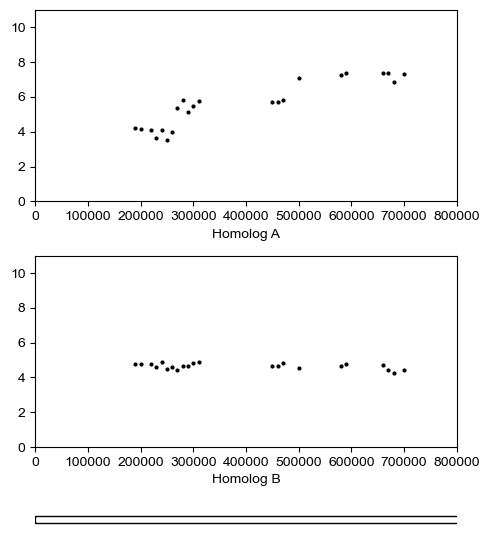

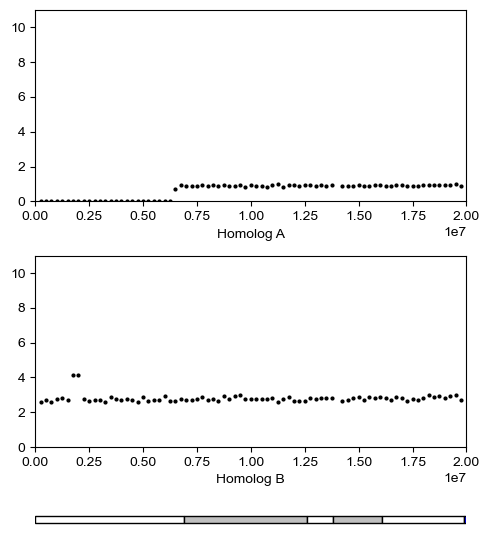

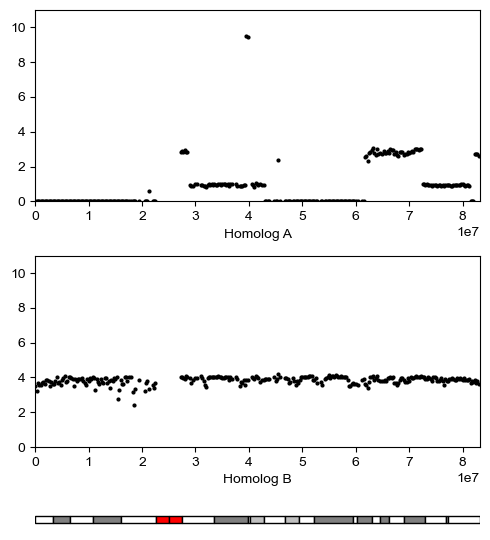

In [5]:
for chrom in ["chr5", "chr19", "chr17"]:
    print(chrom)
    cancer_path = "./cell_line_data/reflinker_haplotypes/pop_hap_solution_20230831_HCC1954_cancer_allvar_"+chrom+".dat"
    cancer_hap = pd.read_csv(cancer_path, header=None, sep="\t")
    cancer_hap = cancer_hap[cancer_hap[7]>0.5].reset_index(drop=True)
    cancer_hap[1] = cancer_hap[1]+1
    
    chrom_counts = counts[counts["CONTIG"]==chrom].reset_index(drop=True)
    chrom_allelic_depths = pd.read_csv("./cell_line_data/HCC1954.hetSNP.AD."+chrom+".txt", sep="\t")

    acn = calculate_acn(chrom_counts, cancer_hap, chrom_allelic_depths, chrom)

    if chrom == "chr5":
        binsize = int(1e4)
        
    else:
        binsize = int(2.5e5)

    chrom_bins_200kb = range(0, getSize(chrom)+binsize, binsize)

    bin_ids = np.digitize(acn.position, chrom_bins_200kb)

    binned_acn = acn[['CN_A', 'CN_B']].groupby(bin_ids).median()

    binned_acn['CN_A'][binned_acn['CN_A'] > 4] = np.log2(binned_acn['CN_A'][binned_acn['CN_A'] > 4]) + 2
    binned_acn['CN_B'][binned_acn['CN_B'] > 4] = np.log2(binned_acn['CN_B'][binned_acn['CN_B'] > 4]) + 2

    binned_counts = acn['position'].groupby(bin_ids).count()
    binned_acn['pos'] = [chrom_bins_200kb[i-1] for i in np.unique(bin_ids)]

    binned_acn = binned_acn[binned_counts >= 20]

    plt.rcParams['figure.figsize'] = [5, 5.5]

    fig, ax = plt.subplots(nrows = 3, gridspec_kw={'height_ratios': [1, 1,  0.15]})

    ax[0].scatter(binned_acn.pos, binned_acn.CN_A, s=4, c="black")
    ax[1].scatter(binned_acn.pos, binned_acn.CN_B, s=4, c="black")

    loop_bands = chr_bands[chr_bands['chrom']==chrom]
    for i in range(loop_bands.shape[0]):
        row = loop_bands.iloc[i]
        rect=mpatches.Rectangle((row['chromStart'], 0.5),
                                row['chromEnd']-row['chromStart'],-0.25, 
                                fill = True,
                                edgecolor = 'black',
                                facecolor = row['color'],
                                linewidth = 1)
        ax[2].add_patch(rect) 
    for i in range(2):
        ax[i].set_ylim([0,11])
    for i in range(3):
        if chrom == "chr5":
            ax[i].set_xlim([0, int(8e5)])
        if chrom == "chr19":
            ax[i].set_xlim([0, int(20e6)])
        if chrom == "chr17":
            ax[i].set_xlim([0, getSize(chrom)])
    ax[2].set_axis_off()

    ax[0].set_xlabel("Homolog A")
    ax[1].set_xlabel("Homolog B")
    ax[2].set_xlabel("HCC1954 "+chrom)

    plt.tight_layout()

### Generating HCC1954 allelic copy-number examples using IntegratedPhasing haplotypes

chr5
chr19
chr17


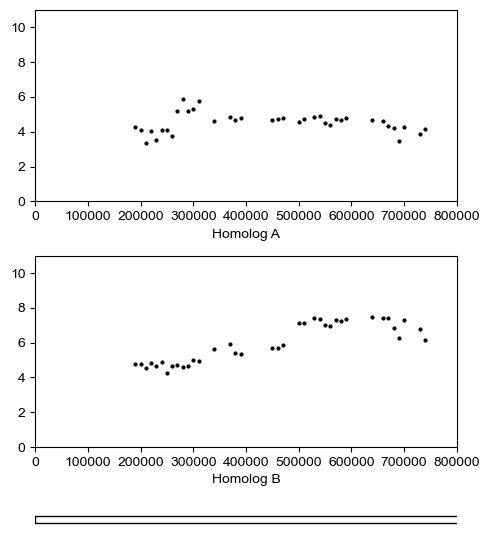

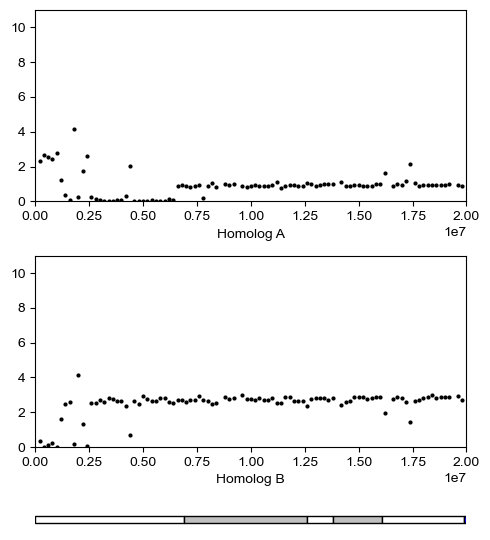

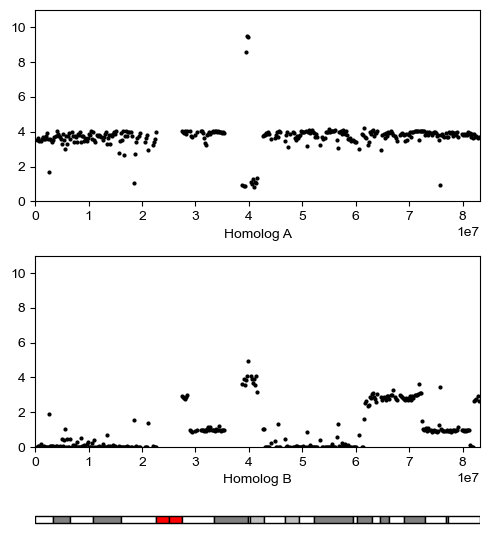

In [6]:
for chrom in ["chr5", "chr19", "chr17"]:
    print(chrom)
    hapcut_path = "./cell_line_data/integrated_phasing_haplotypes/20230901.HCC1954.cancer."+chrom+".phased.VCF"
    cancer_hap = reformat_integrated_phasing(hapcut_path)    
    chrom_counts = counts[counts["CONTIG"]==chrom].reset_index(drop=True)
    chrom_allelic_depths = pd.read_csv("./cell_line_data/HCC1954.hetSNP.AD."+chrom+".txt", sep="\t")

    acn = calculate_acn(chrom_counts, cancer_hap, chrom_allelic_depths, chrom)
    
    if chrom == "chr5":
        binsize = int(1e4)
    else:
        binsize = int(2e5)

    chrom_bins_200kb = range(0, getSize(chrom)+binsize, binsize)

    bin_ids = np.digitize(acn.position, chrom_bins_200kb)

    binned_acn = acn[['CN_A', 'CN_B']].groupby(bin_ids).mean()

    binned_acn['CN_A'][binned_acn['CN_A'] > 4] = np.log2(binned_acn['CN_A'][binned_acn['CN_A'] > 4]) + 2
    binned_acn['CN_B'][binned_acn['CN_B'] > 4] = np.log2(binned_acn['CN_B'][binned_acn['CN_B'] > 4]) + 2

    binned_counts = acn['position'].groupby(bin_ids).count()
    binned_acn['pos'] = [chrom_bins_200kb[i-1] for i in np.unique(bin_ids)]

    binned_acn = binned_acn[binned_counts >= 10]

    plt.rcParams['figure.figsize'] = [5, 5.5]

    fig, ax = plt.subplots(nrows = 3, gridspec_kw={'height_ratios': [1, 1,  0.15]})

    ax[0].scatter(binned_acn.pos, binned_acn.CN_A, s=4, c="black")
    ax[1].scatter(binned_acn.pos, binned_acn.CN_B, s=4, c="black")

    loop_bands = chr_bands[chr_bands['chrom']==chrom]
    for i in range(loop_bands.shape[0]):
        row = loop_bands.iloc[i]
        rect=mpatches.Rectangle((row['chromStart'], 0.5),
                                row['chromEnd']-row['chromStart'],-0.25, 
                                fill = True,
                                edgecolor = 'black',
                                facecolor = row['color'],
                                linewidth = 1)
        ax[2].add_patch(rect) 
    for i in range(2):
        ax[i].set_ylim([0,11])
    for i in range(3):
        if chrom == "chr5":
            ax[i].set_xlim([0, int(8e5)])
        if chrom == "chr19":
            ax[i].set_xlim([0, int(20e6)])
        if chrom == "chr17":
            ax[i].set_xlim([0, getSize(chrom)])
    ax[2].set_axis_off()

    ax[0].set_xlabel("Homolog A")
    ax[1].set_xlabel("Homolog B")
    ax[2].set_xlabel("HCC1954 "+chrom)

    plt.tight_layout()